In [1]:
from pymol import cmd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
avaiable_DF = pd.read_csv("available_result.csv")

In [3]:
SASA_A501_list = []
Surface_A501_list = []
SASA_3DAC_list = []
Surface_3DAC_list = []
for i in range(avaiable_DF.shape[0]):
    cmd.load("A501/A501_summary/%s/relaxed_model_1.pdb"%avaiable_DF["A501_sequence_id"][i],"%s_1"%avaiable_DF["A501_sequence_id"][i])
    Surface_A501_list.append(cmd.get_area('all'))
    cmd.set('dot_solvent',1)
    SASA_A501_list.append(cmd.get_area('all'))
    cmd.reinitialize()

    cmd.load("3DAC/3DAC_summary/%s/relaxed_model_1.pdb"%avaiable_DF["3DAC_sequence_id"][i],"%s_1"%avaiable_DF["3DAC_sequence_id"][i])
    Surface_3DAC_list.append(cmd.get_area('all'))
    cmd.set('dot_solvent',1)
    SASA_3DAC_list.append(cmd.get_area('all'))
    cmd.reinitialize()

    print(i,end=",")

 PyMOL not running, entering library mode (experimental)
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


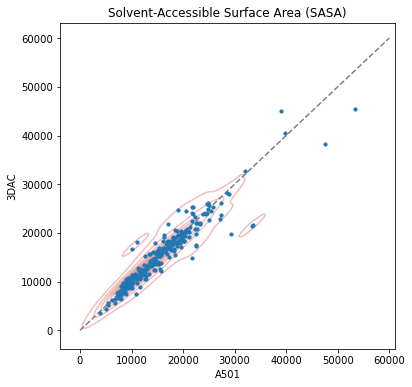

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(SASA_A501_list,SASA_3DAC_list,s=10,zorder=3)
plt.plot([0,60000],[0,60000],color="tab:gray",linestyle="--",zorder=2)
sns.kdeplot(SASA_A501_list,SASA_3DAC_list,shade=False,alpha=0.3,color="tab:red")

plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Solvent-Accessible Surface Area (SASA)")
plt.savefig("Figure/SASA.png")

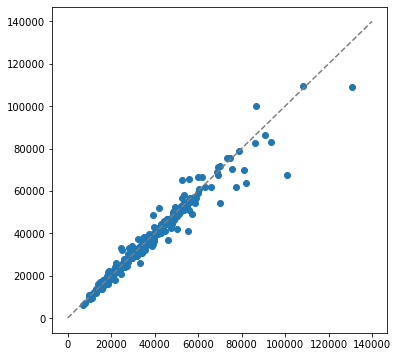

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(Surface_A501_list,Surface_3DAC_list)
plt.plot([0,140000],[0,140000],color="tab:gray",linestyle="--")

In [4]:
avaiable_DF["A501_SASA"] = SASA_A501_list
avaiable_DF["3DAC_SASA"] = SASA_3DAC_list
avaiable_DF["A501_Surface"] = Surface_A501_list
avaiable_DF["3DAC_Surface"] = Surface_3DAC_list
avaiable_DF.to_csv("available_result.csv",index=False)

In [7]:
cmd.load("A501/A501_summary/A501_001/relaxed_model_1.pdb","A501")
cmd.load("3DAC/3DAC_summary/3DAC_210/relaxed_model_1.pdb","3DAC")
cmd.align("A501","3DAC")
cmd.color("firebrick","A501")
cmd.color("skyblue","3DAC")
cmd.ray()
cmd.save("test.png")
cmd.reinitialize()

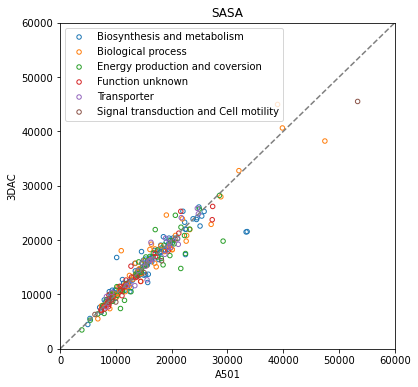

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Biosynthesis and metabolism"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Biosynthesis and metabolism"]["3DAC_SASA"],
            label="Biosynthesis and metabolism",
            edgecolors="tab:blue",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Biological process"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Biological process"]["3DAC_SASA"],
            label="Biological process",
            edgecolors="tab:orange",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Energy production and coversion"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Energy production and coversion"]["3DAC_SASA"],
            label="Energy production and coversion",
            edgecolors="tab:green",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Function unknown"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Function unknown"]["3DAC_SASA"],
            label="Function unknown",
            edgecolors="tab:red",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Transporter"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Transporter"]["3DAC_SASA"],
            label="Transporter",
            edgecolors="tab:purple",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Signal transduction and Cell motility"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Signal transduction and Cell motility"]["3DAC_SASA"],
            label="Signal transduction and Cell motility",
            edgecolors="tab:brown",
            color="None",
            s=20)

plt.plot([0,60000],[0,60000],linestyle="--",color="tab:gray")
plt.xlim(0,60000)
plt.ylim(0,60000)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("SASA")
plt.savefig("Figure/SASA.png",dpi=300)

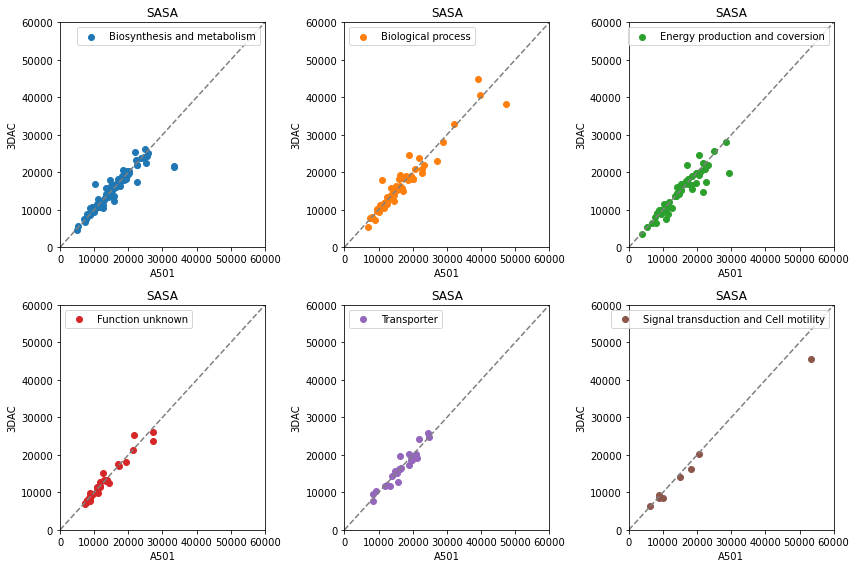

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(231)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Biosynthesis and metabolism"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Biosynthesis and metabolism"]["3DAC_SASA"],
            label="Biosynthesis and metabolism",
            color="tab:blue")
plt.plot([0,60000],[0,60000],linestyle="--",color="tab:gray")
plt.xlim(0,60000)
plt.ylim(0,60000)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("SASA")


plt.subplot(232)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Biological process"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Biological process"]["3DAC_SASA"],
            label="Biological process",
            color="tab:orange")
plt.plot([0,60000],[0,60000],linestyle="--",color="tab:gray")
plt.xlim(0,60000)
plt.ylim(0,60000)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("SASA")


plt.subplot(233)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Energy production and coversion"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Energy production and coversion"]["3DAC_SASA"],
            label="Energy production and coversion",
            color="tab:green")
plt.plot([0,60000],[0,60000],linestyle="--",color="tab:gray")
plt.xlim(0,60000)
plt.ylim(0,60000)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("SASA")


plt.subplot(234)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Function unknown"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Function unknown"]["3DAC_SASA"],
            label="Function unknown",
            color="tab:red")
plt.plot([0,60000],[0,60000],linestyle="--",color="tab:gray")
plt.xlim(0,60000)
plt.ylim(0,60000)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("SASA")


plt.subplot(235)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Transporter"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Transporter"]["3DAC_SASA"],
            label="Transporter",
            color="tab:purple")
plt.plot([0,60000],[0,60000],linestyle="--",color="tab:gray")
plt.xlim(0,60000)
plt.ylim(0,60000)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("SASA")


plt.subplot(236)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Signal transduction and Cell motility"]["A501_SASA"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Signal transduction and Cell motility"]["3DAC_SASA"],
            label="Signal transduction and Cell motility",
            color="tab:brown")
plt.plot([0,60000],[0,60000],linestyle="--",color="tab:gray")
plt.xlim(0,60000)
plt.ylim(0,60000)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("SASA")

plt.tight_layout()
plt.savefig("Figure/SASA_full.png",dpi=300)